# WeatherPy
----

### Analysis
* The temperature becomes significantly warmer in the cities close to the equator. 
* The cities in the northern hemisphere tends to be warmer this time of year than the southern hemisphere.
* There is no strong relationship between latitude and cloudiness.
* There is no strong relationship between latitude and wind speed. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
# from api_keys import api_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# print(api_keys.api_key)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
weathers = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_lenght = len(cities)
print(cities_lenght)

set_length = int(cities_lenght/50)


613
12


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
def process_weather(city):
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={api_keys.api_key}&q={city}&units={units}"
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        weather = {"City": city,
                   "Cloudiness": weather_json["clouds"]["all"], 
                   "Country": weather_json["sys"]["country"], 
                   "Date": weather_json["dt"], 
                   "Humidity": weather_json["main"]["humidity"], 
                   "Lat": weather_json["coord"]["lat"],
                   "Lng": weather_json["coord"]["lon"],
                   "Max Temp": weather_json["main"]["temp_max"],
                   "Wind Speed":weather_json["wind"]["speed"]}
        
        weathers.append(weather)
            
        return True
    except:
        return False
    

In [6]:
#Get real Latitute, Longitute, and weather data for each city

record_num = 1
set_num = 1
log = ""
dash = "-----------------------------\n"
log = "Beginning Data Retrieval\n"

log += dash

for city in cities:
    
    found = process_weather(city)
    
    if found:
        log += "Processing Record " +  str(record_num) + " of Set " + str(set_num) + " | " + city + "\n"
    else:
        log += "City not found. Skipping...\n"

    record_num += 1
    
    if record_num > 50:
        set_num += 1
        record_num = 1
        time.sleep(30)
        
log += dash
log += "Data Retrieval Complete\n"
log += dash
print(log)

# -------- Write log to file-------- 
with open("../Output/WeatherPyLog.txt","w") as txtfile:
    txtfile.write(log) 
    txtfile.close()

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | oranjemund
City not found. Skipping...
Processing Record 5 of Set 1 | kamenka
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | rikitea
City not found. Skipping...
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | coro
Processing Record 11 of Set 1 | ouesso
Processing Record 12 of Set 1 | grindavik
Processing Record 13 of Set 1 | nybro
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | monte patria
Processing Record 16 of Set 1 | zhigansk
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | perehonivka
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | veraval
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of Se

In [7]:
df_weathers = pd.DataFrame(weathers)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df_weathers.to_csv("../Output/WeatherPyData.csv", index=False, header=True)

In [9]:
df_weathers.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,40,US,1538877360,74,22.08,-159.32,82.94,11.41
1,klaksvik,92,FO,1538878800,93,62.23,-6.59,44.60,24.16
2,oranjemund,64,ZA,1538881333,96,-28.55,16.43,56.65,0.69
3,kamenka,0,RU,1538881333,89,53.19,44.05,45.40,14.12
4,new norfolk,20,AU,1538879400,45,-42.78,147.06,64.40,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [16]:
weather_time = time.gmtime(df_weathers.Date.max())
weather_date = str(weather_time.tm_mon) + "/" + str(weather_time.tm_mday) + "/" + str(weather_time.tm_year)

latitute = df_weathers["Lat"]

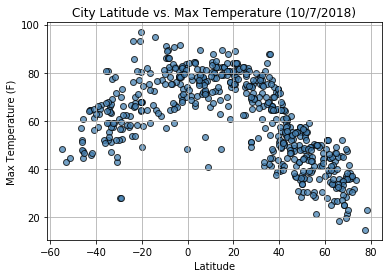

In [18]:
max_temp = df_weathers["Max Temp"]
plt.scatter(latitute, max_temp , marker="o", facecolors='steelblue', edgecolors="black",
            alpha=0.75)
plt.grid()

plt.title("City Latitude vs. Max Temperature (" + weather_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save Figure
plt.savefig("../Output/WeatherPyLatVsMaxTemp.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

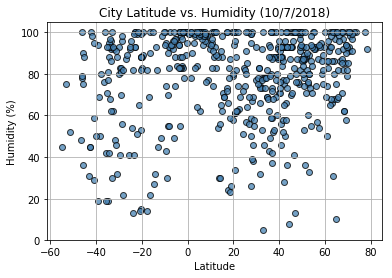

In [19]:

plt.scatter(latitute, df_weathers["Humidity"], marker="o", facecolors='steelblue', edgecolors="black",
            alpha=0.75)
plt.grid()

plt.title("City Latitude vs. Humidity (" + weather_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save Figure
plt.savefig("../Output/WeatherPyLatVsHumidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

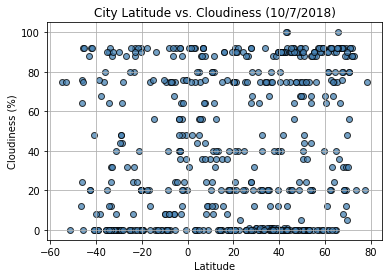

In [20]:

plt.scatter(latitute, df_weathers["Cloudiness"], marker="o", facecolors='steelblue', edgecolors="black",
            alpha=0.75)
plt.grid()

plt.title("City Latitude vs. Cloudiness (" + weather_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save Figure
plt.savefig("../Output/WeatherPyLatVsCloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

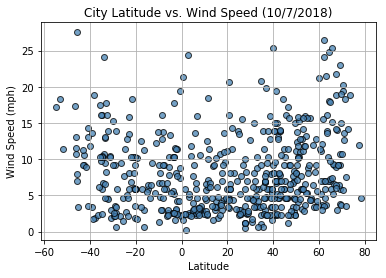

In [21]:

plt.scatter(latitute, df_weathers["Wind Speed"], marker="o", facecolors='steelblue', edgecolors="black",
            alpha=0.75)
plt.grid()

plt.title("City Latitude vs. Wind Speed (" + weather_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save Figure
plt.savefig("../Output/WeatherPyLatVsWindSpeed.png")
# Show plot
plt.show()